# Prediction using Supervised ML

In [1]:
#Importing pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# To read the dataset
data=pd.read_csv("http://bit.ly/w-data")

In [3]:
# To view 10 rows of the data
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
# To check the dimension of the data
data.shape

(25, 2)

In [5]:
# Check missing values in the dataset
print("\nMissing Values : ", data.isnull().sum().values.sum())


Missing Values :  0


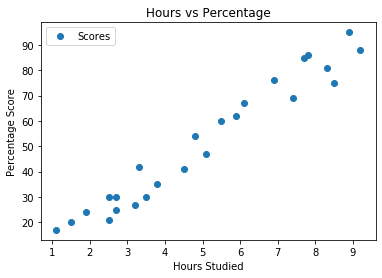

In [6]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score

In [7]:
# Dividing the data to dependent and independent variables
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

Split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [8]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0)

In [9]:
# To train our algorithm
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  

# Fitting the model
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


In [10]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

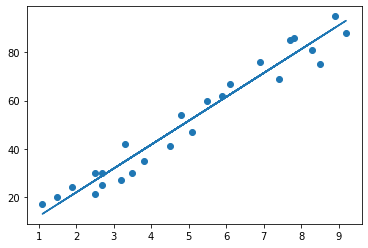

In [11]:
# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [12]:
# Retrieving intercept and coefficients
print("Intercept is : ",regressor.intercept_)
print("Coefficient is : ",regressor.coef_)

Intercept is :  2.018160041434683
Coefficient is :  [9.91065648]


In [13]:
# Testing data - In Hours
print(X_test)
# Predicting the scores
y_pred = regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [14]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


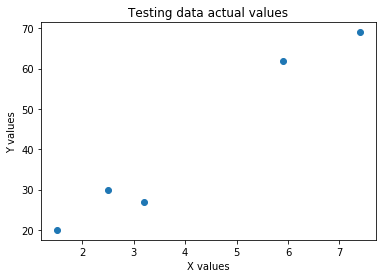

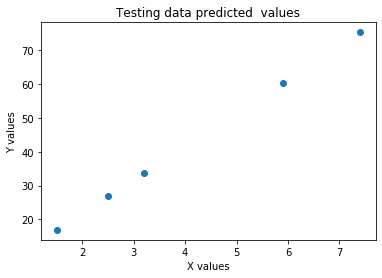

In [15]:
# Visualising predicted and actual values

plt.scatter(X_test,y_test)  
plt.title("Testing data actual values")  
plt.xlabel("X values")  
plt.ylabel("Y values")  
plt.show()

plt.scatter(X_test,y_pred)  
plt.title("Testing data predicted  values")  
plt.xlabel("X values")  
plt.ylabel("Y values")  
plt.show()

In [16]:
# Evaluvating the model 

from sklearn import metrics  
print('Mean Absolute Error:',  metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared  Error:',  metrics.mean_squared_error(y_test, y_pred)) 


Mean Absolute Error: 4.183859899002975
Mean Squared  Error: 21.5987693072174


In [25]:
# To predict the score of a student who studies for 9.25 hours/day
hours=9.25
score_pred = regressor.predict([[hours]])
print("score for 9.25 hours : ",score_pred)

score for 9.25 hours :  [93.69173249]
